In [1]:
import xlrd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dataf (s:str):
    ret = []
    rb = xlrd.open_workbook(s)
    data = rb.sheet_by_index(0)
    for rownum in range(0, data.nrows):
        ret.append(data.row_values(rownum))
    return ret

In [3]:
massive=[]
names=[]
for i in os.listdir('./'):
    if '.xls' in i:
        massive.append(pd.read_excel('./'+str(i), sheet_name='Лист1'))
        names.append(i)

In [4]:
massive[1].columns
    

Index(['УИК',
       'Число избирателей, внесенных в список избирателей на момент окончания голосования',
       'Число избирательных бюллетеней, полученных участковой избирательной комиссией',
       'Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно',
       'Число избирательных бюллетеней, выданных в помещении для голосования в день голосования',
       'Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования',
       'Число погашенных избирательных бюллетеней',
       'Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования',
       'Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования',
       'Число недействительных избирательных бюллетеней',
       'Число действительных избирательных бюллетеней',
       'Число утраченных избирательных бюллетеней',
       'Число избирательных бюллетеней, не учтенных при получении',
       '1.Булаев Олег Александрович', '2.Виноград

In [5]:
names

['Некрасовский.xls',
 'Ярославль.Дзержинская.xls',
 'Даниловский.xls',
 'Ярославль.Ленинский.xls',
 'Ярославль.Заволжский.xls',
 'ЯО Цифра.xls',
 'Первомайский.xls',
 'Ярославль.Фрунзенский.xls',
 'Пошехонский.xls',
 'Тутаевская.xls',
 'Любимский.xls',
 'Рыбинская.xls']

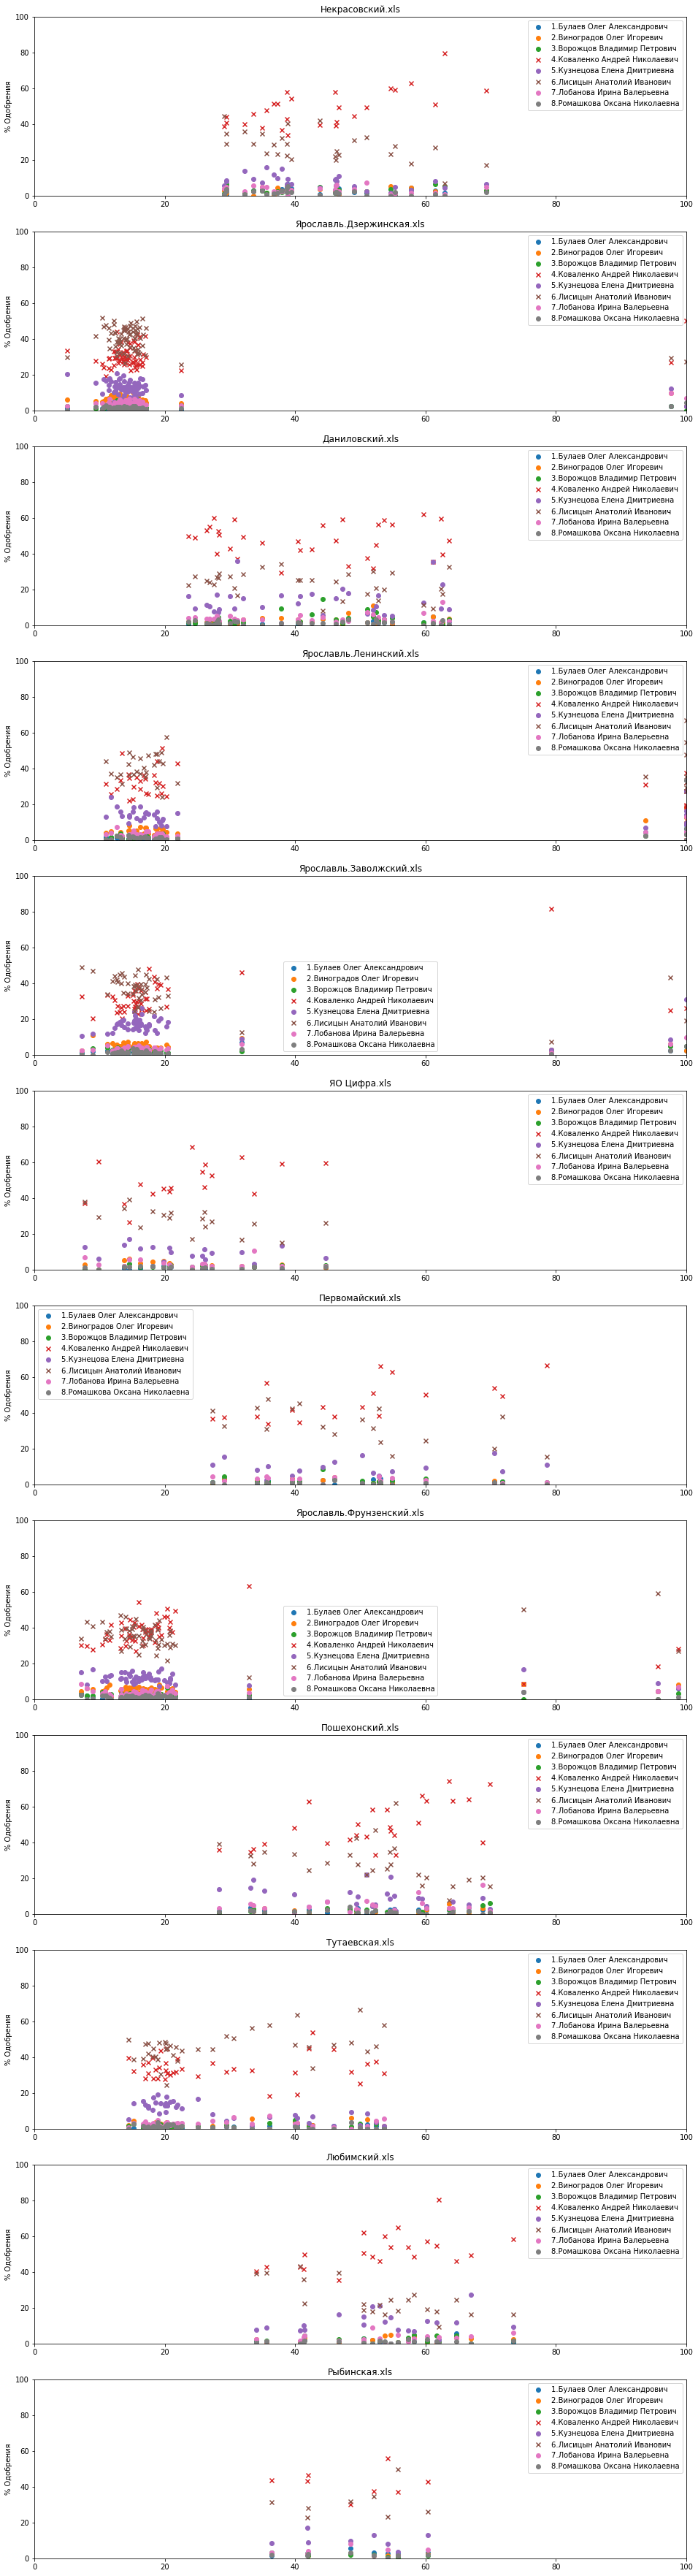

In [7]:
fig, axes = plt.subplots(len(names), 1, figsize = (16,64))
for i in range (0, len(names)):
    yavka = ((massive[i]['Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования']+massive[i]['Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно']+massive[i]['Число избирательных бюллетеней, выданных в помещении для голосования в день голосования'])/massive[i]['Число избирателей, внесенных в список избирателей на момент окончания голосования'])*100
    chgolosov = (massive[i]['Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования']+massive[i]['Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно']+massive[i]['Число избирательных бюллетеней, выданных в помещении для голосования в день голосования'])
    axes[i].scatter (yavka, (massive[i]['1.Булаев Олег Александрович']/chgolosov)*100)
    axes[i].scatter (yavka, (massive[i]['2.Виноградов Олег Игоревич']/chgolosov)*100)
    axes[i].scatter (yavka, (massive[i]['3.Ворожцов Владимир Петрович']/chgolosov)*100)
    axes[i].scatter (yavka, (massive[i]['4.Коваленко Андрей Николаевич']/chgolosov)*100, marker='x')
    axes[i].scatter (yavka, (massive[i]['5.Кузнецова Елена Дмитриевна']/chgolosov)*100)
    axes[i].scatter (yavka, (massive[i]['6.Лисицын Анатолий Иванович']/chgolosov)*100,  marker='x')
    axes[i].scatter (yavka, (massive[i]['7.Лобанова Ирина Валерьевна']/chgolosov)*100)
    axes[i].scatter (yavka, (massive[i]['8.Ромашкова Оксана Николаевна']/chgolosov)*100)
    axes[i].set_title(names[i])
    axes[i].legend(['1.Булаев Олег Александрович','2.Виноградов Олег Игоревич','3.Ворожцов Владимир Петрович','4.Коваленко Андрей Николаевич','5.Кузнецова Елена Дмитриевна','6.Лисицын Анатолий Иванович','7.Лобанова Ирина Валерьевна','8.Ромашкова Оксана Николаевна'])
    #axes[i].legend(['4.Коваленко Андрей Николаевич','6.Лисицын Анатолий Иванович'])
    axes[i].set_xlim (0,100)
    axes[i].set_ylim (0,100)
    axes[i].set_ylabel('% Явка')
    axes[i].set_ylabel('% Одобрения')

In [23]:
smassive = pd.concat(i for i in massive)

Text(0, 0.5, '% Одобрения')

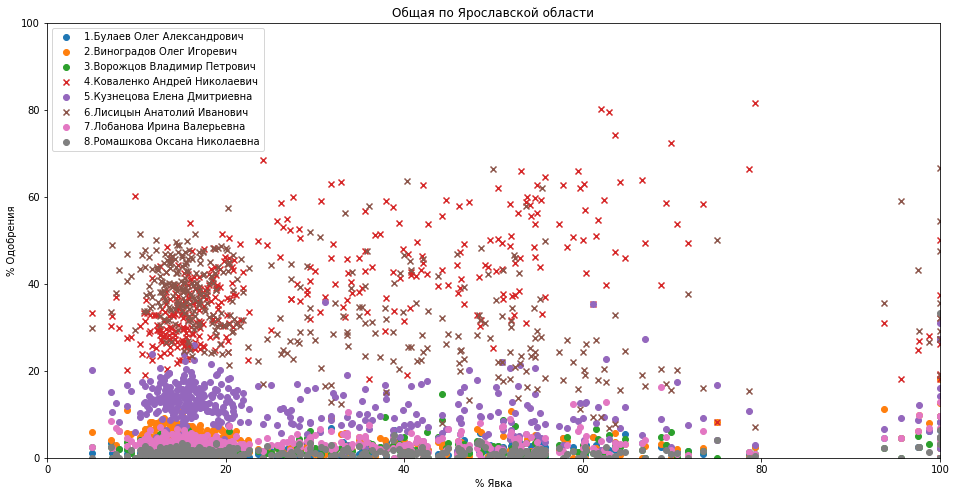

In [37]:
yavkacom = ((smassive['Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования']+smassive['Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно']+smassive['Число избирательных бюллетеней, выданных в помещении для голосования в день голосования'])/smassive['Число избирателей, внесенных в список избирателей на момент окончания голосования'])*100
chgolosov = (smassive['Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования']+smassive['Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно']+smassive['Число избирательных бюллетеней, выданных в помещении для голосования в день голосования'])
fig, axe = plt.subplots(1, 1, figsize=(16,8))
axe.scatter (yavkacom, (smassive['1.Булаев Олег Александрович']/chgolosov)*100)
axe.scatter (yavkacom, (smassive['2.Виноградов Олег Игоревич']/chgolosov)*100)
axe.scatter (yavkacom, (smassive['3.Ворожцов Владимир Петрович']/chgolosov)*100)
axe.scatter (yavkacom, (smassive['4.Коваленко Андрей Николаевич']/chgolosov)*100, marker='x')
axe.scatter (yavkacom, (smassive['5.Кузнецова Елена Дмитриевна']/chgolosov)*100)
axe.scatter (yavkacom, (smassive['6.Лисицын Анатолий Иванович']/chgolosov)*100, marker='x')
axe.scatter (yavkacom, (smassive['7.Лобанова Ирина Валерьевна']/chgolosov)*100)
axe.scatter (yavkacom, (smassive['8.Ромашкова Оксана Николаевна']/chgolosov)*100)
axe.set_title('Общая по Ярославской области')
axe.legend(['1.Булаев Олег Александрович','2.Виноградов Олег Игоревич','3.Ворожцов Владимир Петрович','4.Коваленко Андрей Николаевич','5.Кузнецова Елена Дмитриевна','6.Лисицын Анатолий Иванович','7.Лобанова Ирина Валерьевна','8.Ромашкова Оксана Николаевна'])
#plt.legend(['4.Коваленко Андрей Николаевич','6.Лисицын Анатолий Иванович'])
axe.set_xlim (0,100)
axe.set_ylim (0,100)
axe.set_xlabel('% Явка')
axe.set_ylabel('% Одобрения')

In [60]:
namesofcandidates=smassive.columns[13:]

In [63]:
len(namesofcandidates)

8

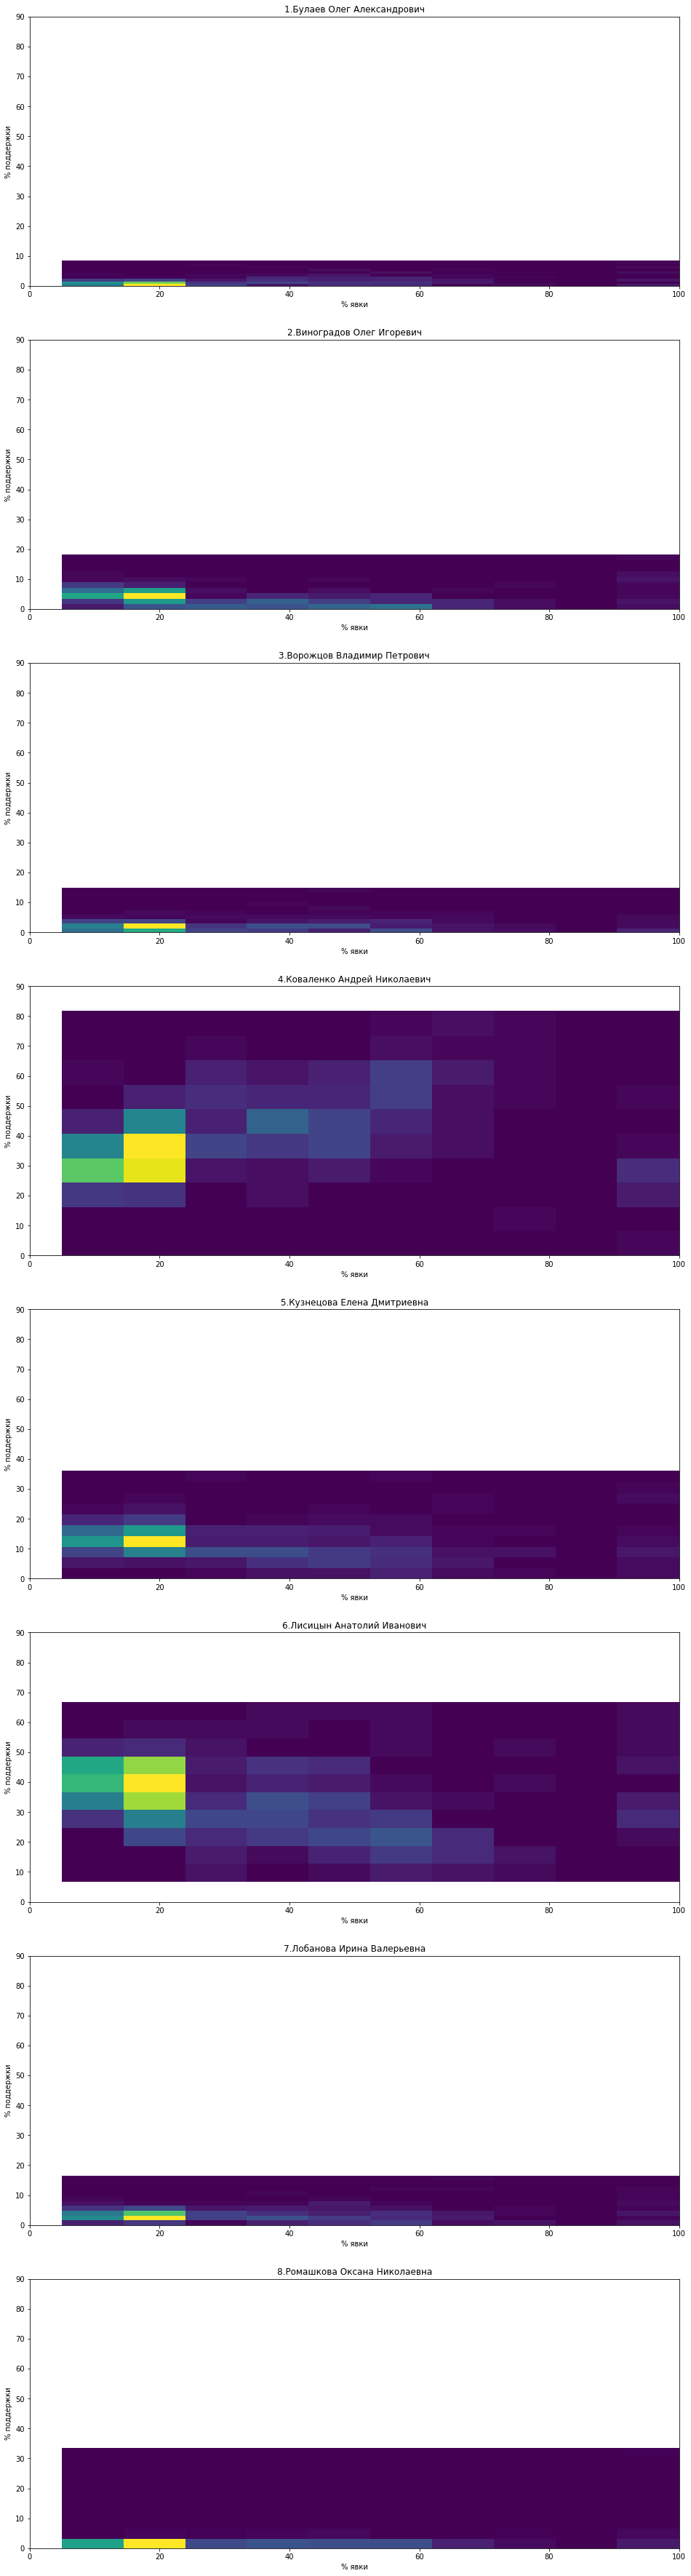

In [70]:
fig, axe = plt.subplots(len(namesofcandidates), 1, figsize=(16,64))
for j in range(0, len(namesofcandidates)):
    axe[j].hist2d (yavkacom, (smassive[namesofcandidates[j]]/chgolosov)*100)
    axe[j].set_ylabel('% поддержки')
    axe[j].set_xlabel('% явки')
    axe[j].set_ylim(0,90)
    axe[j].set_xlim(0,100)
    axe[j].set_title(namesofcandidates[j])

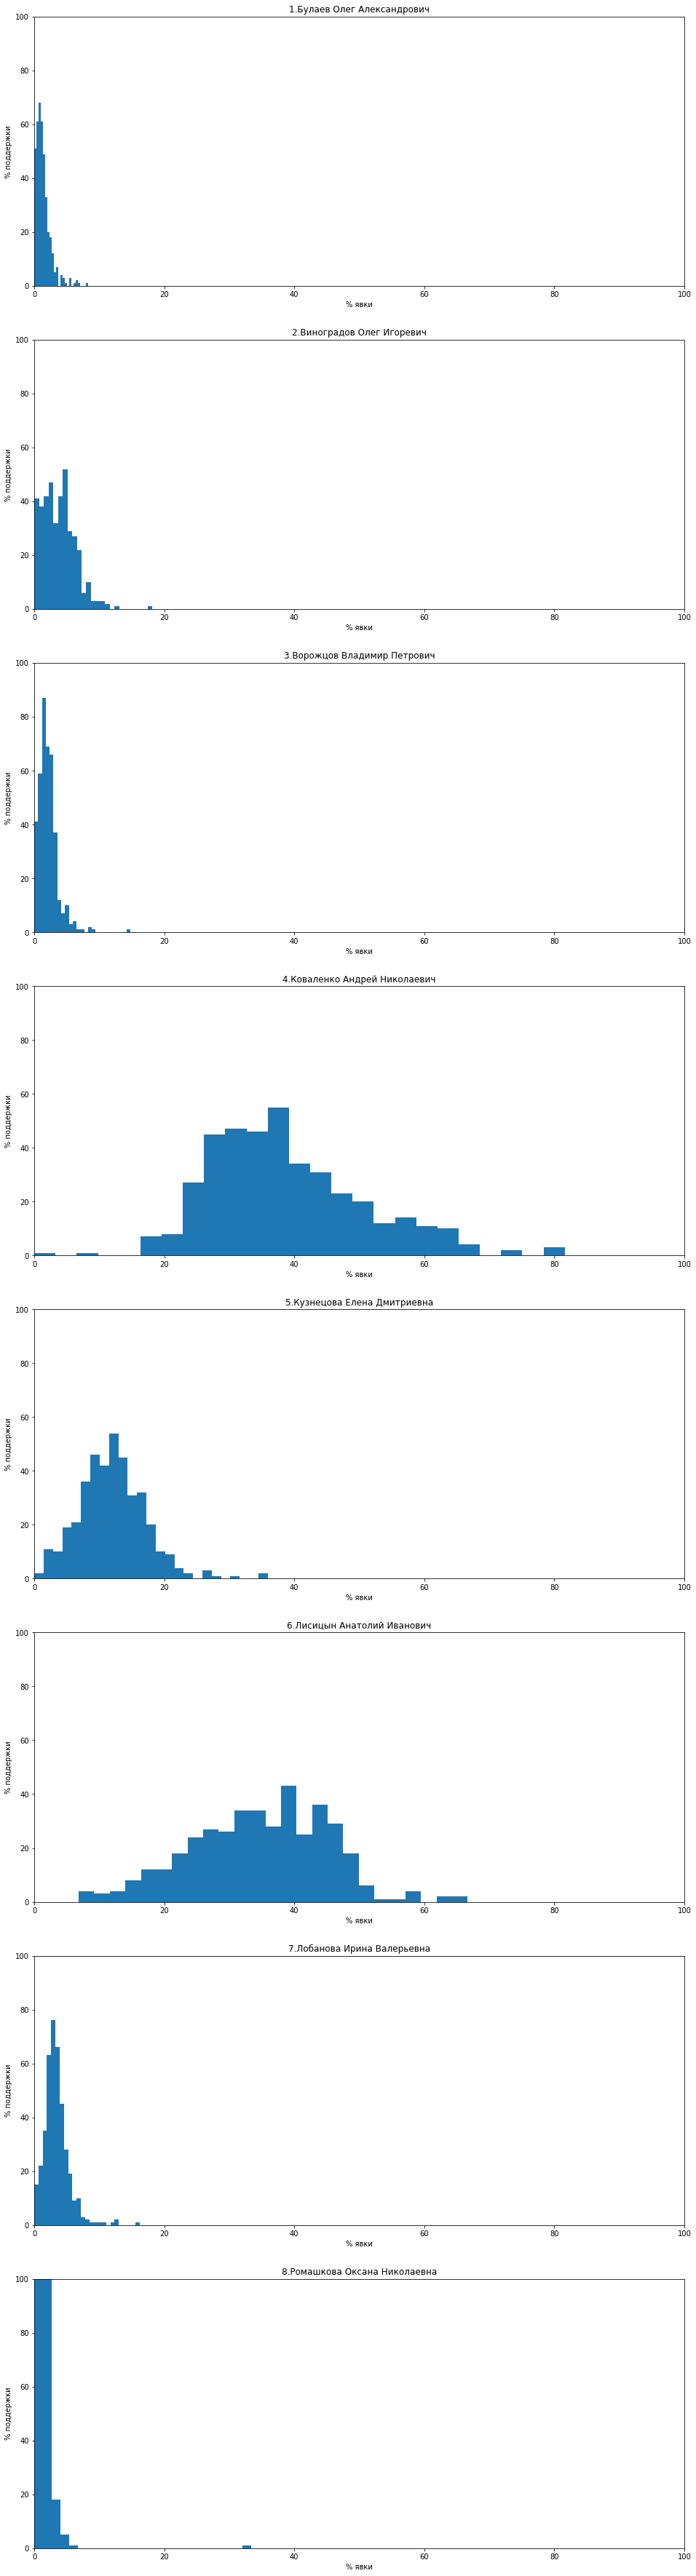

In [84]:
fig, axe = plt.subplots(len(namesofcandidates), 1, figsize=(16,64))
for j in range(0, len(namesofcandidates)):
    axe[j].hist ((smassive[namesofcandidates[j]]/chgolosov)*100, bins=25)
    axe[j].set_ylabel('% поддержки')
    axe[j].set_xlabel('% явки')
    axe[j].set_ylim(0,100)
    axe[j].set_xlim(0,100)
    axe[j].set_title(namesofcandidates[j])